# Central Limit Theorem

The Central Limit Theorem (hereafter, CLT) is the most important and most significant result in all of probability and statistics. It explains the profound importance of the normal distribution, and provides a foundation, essentially, for all of elementary statistics. 

In [2]:
import numpy as np
from numpy import arange,linspace, mean, var, std, unique
import matplotlib.pyplot as plt  
from numpy.random import random, randint, uniform, choice, binomial, geometric, exponential
from collections import Counter
%matplotlib inline 

from scipy.special import comb
           
def C(N,K):    
    return comb(N,K,True)     # just a wrapper around the scipy function


# This draws a useful bar chart for the distribution of the list of integers in outcomes

def draw_distribution_from_outcomes(outcomes, title='Experimental Probability Distribution', my_xticks = [], f_size = (8,6)):
    plt.figure(figsize=f_size)
    num_trials = np.size(outcomes)
    X = range( int(min(outcomes)), int(max(outcomes))+1 )    # 
    freqs = Counter(outcomes)
    Y = [freqs[i]/num_trials for i in X]
    plt.bar(X,Y,width=1.0,edgecolor='black')
    if my_xticks != []:
        plt.xticks(X, my_xticks)
    elif (X[-1] - X[0] < 30):
        ticks = range(X[0],X[-1]+1)
        plt.xticks(ticks, ticks) 
    plt.xlabel("Outcomes")
    plt.ylabel("Probability")
    plt.title(title)
    plt.show()
    
# Example of use

#draw_distribution_from_outcomes([1,4,3,5,4,6,2,4,3,5,4])

# This function takes a list of outcomes and a list of probabilities and
# draws a chart of the probability distribution.
# It allows labels for x axis with numbers or strings; for the latter, you
# still need to give the numeric labels, but can overwrite them with your string labels. 

def draw_distribution_of_random_variable(Rx, Px, title='Probability Mass Function', my_xticks = [], f_size = (8,6)):
    plt.figure(figsize=f_size)
    plt.bar(Rx,Px,width=1.0,edgecolor='black')
    plt.ylabel("Probability")
    plt.xlabel("Outcomes")
    if my_xticks != []:
        plt.xticks(Rx, my_xticks)
    elif (Rx[-1] - Rx[0] < 30):
        ticks = range(Rx[0],Rx[-1]+1)
        plt.xticks(ticks, ticks)  
    plt.title(title)
    plt.show()
    
# Example of use
    
#draw_distribution_of_random_variable([1,2,3,4], [0.25,0.35,0.15,0.25])

#p = 0.14159234368

#                                                                                        ||||||||||||||||
# Notice how we gave strings as labels for the outcomes:                                 vvvvvvvvvvvvvvvv

#draw_distribution_of_random_variable( [0,1], [p,1.0-p],"Distribution for Unfair Coin", ['Heads','Tails'],(5,4))
 


from scipy.stats import norm, binom, expon, geom, poisson, gamma, nbinom, bernoulli                 

# https://docs.scipy.org/doc/scipy/reference/stats.html

#### Normal Distribution    #####

######   Note that in this library loc = mean and scale = standard deviation  #####

# Examples assume random variable X (e.g., housing prices) normally distributed with  mu = 60, sigma = 10

# Probability Density Function    (really only useful for drawing the curve)
#  f(x) = P(X == x)

norm.pdf(x=50,loc=60, scale= 10)     

# Cumulative Density Function
#  F(x) = P(X < x)

# Example:  Percentage of houses less than 50K. 
norm.cdf(x=50,loc=60,scale=10) 

# Example:  Find P(60<X<80)
norm.cdf(x=80,loc=60,scale=40) - norm.cdf(x=60,loc=60,scale=40)

# Survival Function: Simply 1 - CDF, i.e., P(X > x)

# Example:  Percentage of houses more than 50K.
norm.sf(x=50,loc=60,scale=10) 

# Percentage Point Function: Inverse of the CDF:
# For what is the largest value of k for which P( X < k ) = q  ?

# Example: What is the maximum cost of the 5% cheapest houses, 
# i.e., the x such that P(X < x) = 0.05?

norm.ppf(q=0.05,loc=60,scale=40)

# Inverse Survival Function: Inverse (1 - CDF):
# For what is the smallest value of k for which P( X > k ) = q  ?

# Example: What is the minimum cost of the 5% most expensive houses, 
# i.e., the x such that P(X > x) = 0.05?

norm.isf(q=0.05,loc=60,scale=40)

#   Give the endpoints of the interval (centered on the mean)
#   which contain alpha/100 percent of the population (alpha is a probability)

# Ex. Give the interval for the middle 75% of the houses

norm.interval(alpha=0.75, loc=60, scale=40)

# generate a random variate
norm.rvs(loc=60, scale=40)

# generate random variates, returns list of length = size
norm.rvs(loc=60, scale=40, size=10)

#####   Exponential Distribution     ########

#####  loc = minimum value (leave at 0 always)               ##### 
#####  scale = mean = 1 / lambda (using textbook notation)   #####

# Probability Density Function  f(x)       (Only useful for graphing and showing shape)

lam = 4
expon.pdf(x=5,loc=0, scale=1/lam)        # Must use 'scale = 1/lambda' to be consistent with textbook and lecture  

# Cumulative Density Function
#  F(x) = P(X < x)

expon.cdf(x=5,loc=0,scale=1/lam) 

# Example:  Find P(6<X<8)
expon.cdf(x=8,loc=0,scale=1/lam) - expon.cdf(x=6,loc=0,scale=1/lam)

# Percentage Point Function: Inverse of the CDF:
# For which value of x does P( X < x ) = q  ?

expon.ppf(q=0.05,loc=0,scale=1/lam)

# Survival Function: Simply 1 - CDF, i.e., P(X > x)

expon.sf(x=5,loc=0,scale=1/lam) 

# Inverse Survival Function: Inverse (1 - CDF):
# For what is the value of k for which P( X > k ) = q  ?

expon.isf(q=0.05,loc=0,scale=1/lam)

#g. generate a random variate
expon.rvs(loc=0, scale=1/lam)

#h. generate random variates, returns list of length = size
expon.rvs(loc=0, scale=1/lam, size=10)

# Same for Poisson, nbinom, gamma, bernoulli, etc. as shown here:

##### Bernoulli Distribution  X ~ Bernoulli(p)  ####

#  p = probability of success for Bernoulli trial

# Generate a random variate
bernoulli.rvs(p=0.5)

# Generate a list of random variates
bernoulli.rvs(p=0.5,size=100)

##### Binomial Distribution  X ~ B(n,p)  ####

#  n = number of independent Bernoulli trials
#  p = probability of success for Bernoulli trial
#  k = outcome in range [0 .. n]

# Generate a random variate
binom.rvs(n=10, p=0.5)

# Generate a list of random variates
binom.rvs(n=10, p=0.5,size=100)

# Probability mass function.
binom.pmf(k=4, n=10, p=0.5)

# Cumulative distribution function
binom.cdf(k=4, n=10, p=0.5)

print() 


## Warm up to the CLT

This section reviews basic results on random variables earlier in the course, but
also introduces formally the notion of the mean of a sample from a population (represented by
a random variable). 
 

### Sampling

Suppose you have a random variable $X$ (e.g., representing the heights of BU students). If we "poke" this random variable (e.g., by selecting a BU student and measuring his or her height) we obtain one measurement from 
the set of all possible outcomes (e.g., the heights of all BU students). 

The process of randomly selecting $N$ outcomes (for example, selecting 100 BU students and measuring their heights) is called **sampling** and results in a collection

$$\{ X_1, X_2, X_3, \ldots, X_N \}.$$

Formally, we say that $X_1, X_2, \ldots, X_N$ are $N$ i.i.d. (independent and identically distributed) random variables, all with the same finite mean $\mu$ and variance $\sigma^2$.  (However, intuitively these are $N$
"pokes" of the same random variable $X$.)

  In the simple case of sampling from a population, each $X_i$ represents 
the random choice of a member of that population, but this is only the most obvious application in statistics. 
$X$ can be **any** random variable. 

### The Sample Mean  $\overline{X}_n$
 
Now we consider the random variable $\overline{X}_n$ representing the expected value of the $X_i$, i.e., 

$$ \overline{X}_n = \frac{X_1 + X_2 + \cdots + X_N}{N}.$$

This random variable is called the **sample mean** of the sample $\{ X_1, X_2, X_3, \ldots, X_N \}.$

Be sure that you understand that this is a random variable, defined by $X$ and $N$: one "poke" of this
random variable represents the mean of $N$ "pokes" of the underlying random variable. 


**Example 1:**  Suppose you are trying to understand the height of BU students. Let the RV $X$ = "the height in inches of a random BU student."  If $N=100$, then the RV $ \overline{X}_{100}$ is the result of the following random experiment:  Randomly select 100 BU students, measure their heights in inches, and return as the outcome of  
$ \overline{X}_{100}$ the average (arithmetic mean) of these 100 measurements. 


**Example 2:**  Suppose you are trying to understand the outcome of an election between two candidates A and B. Let the  $X$ = 1 if a person votes for A and 0 if he/she voted for B.   If $N=1000$, then the RV $ \overline{X}_{1000}$ is the result of the following random experiment:  Perform a survey by randomly selecting 1000 voters, asking who they voted for, and collecting the results as a sequence of 0's and 1's, and then taking the average of these values.  Then
$ \overline{X}_{1000}$ is the percentage of the sampled population who voted for A.  


Now, since $\overline{X}_N$ is just another random variable, it has an expected value $E\bigl(\overline{X}_N\bigr)$, variance $Var\bigl(\overline{X}_N\bigr)$, and standard deviation $\sigma_{\overline{X}_N}$. 

### The Mean of the Sample Mean:   $E\bigl(\overline{X}_N\bigr)$


Using the linearity of expectation, namely, 

$$  E( a\cdot X + b) = a\cdot E(X) + b$$

and 

$$ E(X + Y) = E(X) + E(Y)$$

we have

$$E(X_1 + X_2 + \cdots + X_N) = N \cdot E( X )   $$

and so

$$E\big(\overline{X}_N\big) =  E\bigg(\frac{X_1 + X_2 + \cdots + X_N}{N}\bigg) = \frac{1}{N} \cdot N \cdot E(X) = E(X).    $$

This gives us the (not unexpected) result that the expected value of the sample mean is the mean of the population
represented by $X$. 

**Example 1:** If the average height of a BU student is in fact 67 inches, then if we
perform the sampling experiment every day, the results (the mean of the 100 students selected that day)
over multiple days will have a mean of 67 inches. 

**Example 2:**  If in fact 66.8% of the population voted for A, and if we perform the 
survey multiple times, the average of the survey results will be 66.8 %. 


### Variance and Standard Deviation of $\overline{X}_N$

What about the variance of $X$? As shown in lecture, we have

$$
    Var(a\cdot X + b) = a^2\cdot Var(X)  
$$

and 

$$\sigma_{a\cdot X+b} = \vert a\vert \cdot\sigma_X.$$ 

and for independent $X$ and $Y$, 

$$  Var(X + Y) = Var(X) + Var(Y).  $$

Therefore, 

$$Var(X_1 + X_2 + \cdots + X_N) = N \cdot Var( X )   $$

and

$$\begin{aligned}
    Var\Bigl(\frac{X_1 + X_2 + \cdots + X_N}{N}\Bigr) & = \frac{Var(X_1 + X_2 + \cdots + X_N)}{N^2} &\\[3pt]
        & = \frac{Var(X_1) + Var(X_2) + \cdots + Var(X_N)}{N^2} &\\[3pt]
        & = \frac{n\cdot Var(X)}{N^2} &\\[3pt]
        & = \frac{Var(X)}{N} &\\[3pt]
\end{aligned}$$

and the standard deviation is

$$\sigma_{\overline{X}_N} = \frac{\sigma_X}{\sqrt{N}}$$ 


So the punchline is that the random variable ${\overline{X}_N}$ has

-  The same expected value as the underlying random variable $X$; but

- A variance which is decreased by a linear factor ${1 \over N}$ compared with $Var(X)$; and 

- A standard deviation which is decreased by the factor ${1 \over \sqrt N}.$


### Experiment One: Back to Coin Flips...

Now we can finally be precise about our experiment (from day one!) of flipping a fair coin and taking the average
of the number of heads! If we flip a fair coin once, we have  Bernoulli(1/2) with a mean of 1/2 and a standard deviation of 1/4.  If we flip the coin $N$ times, it converges to its mean value 1/2 in the very precise sense that the standard deviation is 

$$\sigma\,=\,\frac{1}{4\sqrt{N}}$$

[0.54, 0.56, 0.5, 0.45, 0.49, 0.48, 0.51, 0.51, 0.51, 0.45]


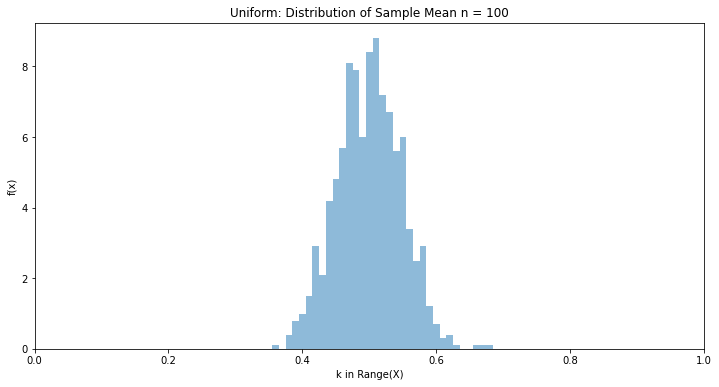

sigma:  0.025


In [86]:
def sample_mean_fair_coin(N):
    return sum([randint(2) for i in range(N)]) / N

def display_sample_mean_fair_coin(n,num_trials,decimals):
    fig, ax = plt.subplots(1,1,figsize=(12,6))
    ax.set_xlim(0,1)
    #ax.set_ylim(0,10)
    plt.title('Uniform: Distribution of Sample Mean n = ' + str(n))
    plt.ylabel("f(x)")
    plt.xlabel("k in Range(X)")
    
    # use bernoulli to generate random samples
    X = [sample_mean_fair_coin(n) for i in range(num_trials)]
    Xrounded = [np.around(x,decimals) for x in X]
    print(Xrounded[:10])
    # Now convert frequency counts into probabilities
    D = Counter( Xrounded )
    Xrounded = unique(Xrounded)       # sorts and removes duplicates
    P = [10**decimals*D[k]/num_trials for k in Xrounded]              # must multiply probs by 10**decimals because
    plt.bar(Xrounded,P,width=1/10**decimals, alpha=0.5) # bins are of width 1/10**decimals
    

    plt.show()

N =100                # try for 1, 2, 5, 10, 30, 100, 1000
num_trials = 10**3
digits_of_precision = 2
display_sample_mean_fair_coin(N,num_trials,digits_of_precision)
print("sigma: ", np.around(0.25 / np.sqrt(N),6))

You can see this graphically if we plot the mean of n = 1, ..., 1000 coin flips; we can see that the distribution of the mean value decreases as we increase $N$ = the number of flips:

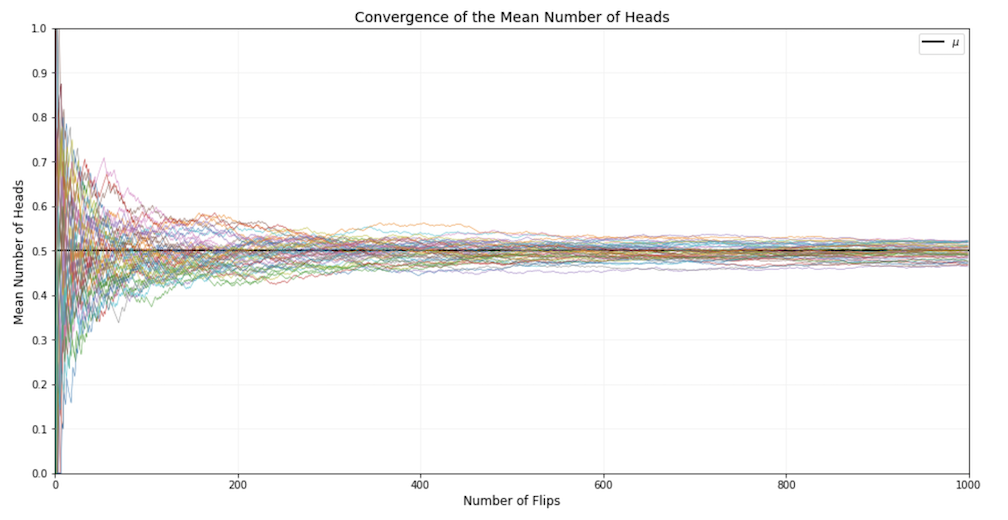

If we put over top of this diagram the boundaries for 1, 2, and 3 standard deviations, we get:

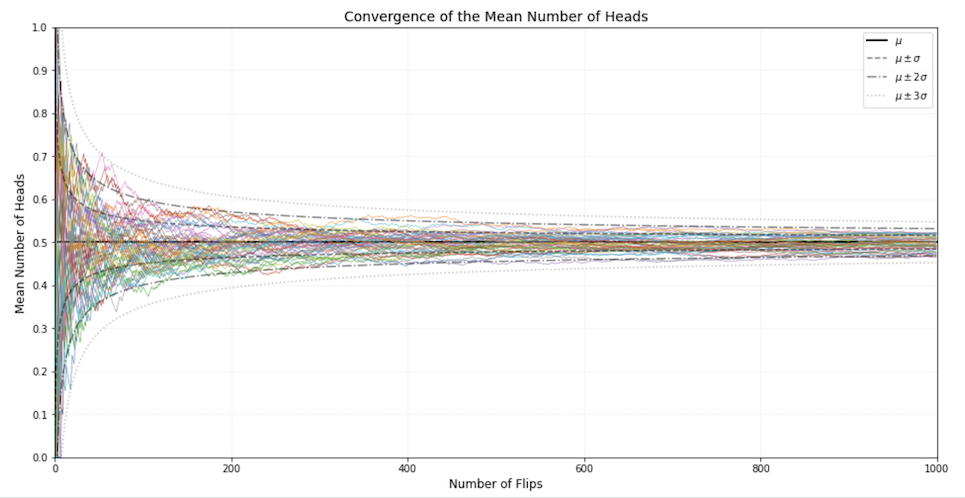

## Experiment Two: How does variance decrease as n gets larger?

Let's look at the uniform distribution between  0 and 1 (such as returned by `random()`) and see
what happens when we sample more and more values and calculate the sample mean. 

[0.5471608400866622, 0.4781881101089737, 0.558821328504293, 0.4872990713036371, 0.5407108401575162, 0.5198113462086017, 0.5257534378819768, 0.51553485787364, 0.5938759208980341, 0.5104310422085409, 0.4836709019617399, 0.501521231378261, 0.47514629209755943, 0.4609235312275073, 0.498115541004465, 0.4875332921493522, 0.5098843650460457, 0.5210587092028133, 0.5283622369258777, 0.4539666239308419]
[0.547, 0.478, 0.559, 0.487, 0.541, 0.52, 0.526, 0.516, 0.594, 0.51, 0.484, 0.502, 0.475, 0.461, 0.498, 0.488, 0.51, 0.521, 0.528, 0.454]


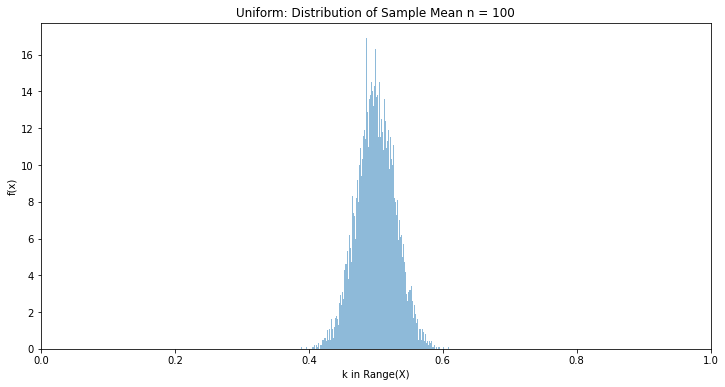

In [69]:
def sampleMeanUniform(n):
    return sum([random() for i in range(n)]) / n

def display_sample_mean_uniform(n,num_trials,decimals):
    fig, ax = plt.subplots(1,1,figsize=(12,6))
    ax.set_xlim(0,1)
    #ax.set_ylim(0,10)
    plt.title('Uniform: Distribution of Sample Mean n = ' + str(n))
    plt.ylabel("f(x)")
    plt.xlabel("k in Range(X)")
    
    # use bernoulli to generate random samples
    X = [sampleMeanUniform(n) for i in range(num_trials)]
    print(X[:20])
    Xrounded = [np.around(x,decimals) for x in X]
    print(Xrounded[:20])
    # Now convert frequency counts into probabilities
    D = Counter( Xrounded )
    Xrounded = unique(Xrounded)       # sorts and removes duplicates
    P = [10**decimals*D[k]/num_trials for k in Xrounded]              # must multiply probs by 10**decimals because
    plt.bar(Xrounded,P,width=1/10**decimals, alpha=0.5) # bins are of width 1/10**decimals
    

    plt.show()

n =100                # try for 1, 2, 5, 10, 30, 100, 1000
num_trials = 10**4
display_sample_mean_uniform(n,num_trials,3)

However, we can say much more than this, and that is the content of the next section. 

## The Central Limit Theorem

We expect the normal distribution to arise whenever the outcome of a situation results from numerous small additive components, with no single or small group of effects dominant (since all the components are independent). Hence, it occurs regularly in biostatistics (where many genes and many environmental factors add together to produce some result, such as intelligence or height), in errors in measurement (where many small errors add up), and finance (where many small effects contribute to the price of a stock). 
The CLT provides the formal justification for this phenomenon. 



To state the CLT, first, suppose we <strong>standardize</strong> $\overline{X}_N$ by subtracting $\mu$ and dividing by its standard deviation $ \frac{\sigma}{\sqrt{N}}$ to obtain a new random variable $Z_N$:

$$
          Z_N = \frac{\overline{X}_N - \mu }{\frac{\sigma}{\sqrt{N}}}        
$$

Then the CLT states that as $n\mapsto\infty$, $Z_N$ converges to the standard normal $Z\sim N(0,1)$, that is:

$$
          \lim_{n \to \infty}\, P( Z_N \le a ) \,= \int_{-\infty}^a
          \frac{1}{\sqrt{2 \pi}} e^{-x^2/2} \; dx
$$

A simpler version of this theorem is the following, which has immense consequences for the development of sampling theory (which is our next topic in CS 237). 

<blockquote>
As $N$ gets large, the random variable $\overline{X}_N$ converges to the distribution $N\big(\mu_X,\frac{\sigma_X^2}{N}\big)$ with standard deviation $\frac{\sigma_X}{\sqrt N}.$
</blockquote>

The most significant fact about sampling is that the standard deviation of $\frac{\sigma}{\sqrt{N}}$ has a normal distribution whose standard deviation gets smaller as $N$ gets larger. 

 We can use the strong properties of the normal distribution, such as the "68-95-99 rule," to quantify the randomness inherent in the sampling process. This will be the fundamental fact we will use in developing the various statistical procedures in elementary statistics. 





## Experiments with the CLT

We will verify the CLT with several distributions:

    - Uniform     U ~ random()                 mean is 0.5   std dev = sqrt( 1/ 12 ) 
    - Bernoulli   X ~ Bernoulli(p=0.61)        mean is 0.61  std dev = (0.61)*(0.39)   
    - Exponential E ~ Exponential(lambda=0.1)  mean is 10    std dev = 100
    - Normal      Y ~ N(mu=66,sigma^2=9)       mean is 66    std dev = 3
    - Combination of all four, standardized to have mean 0 and variance 1. 


## Experiment Three: Uniform Distribution

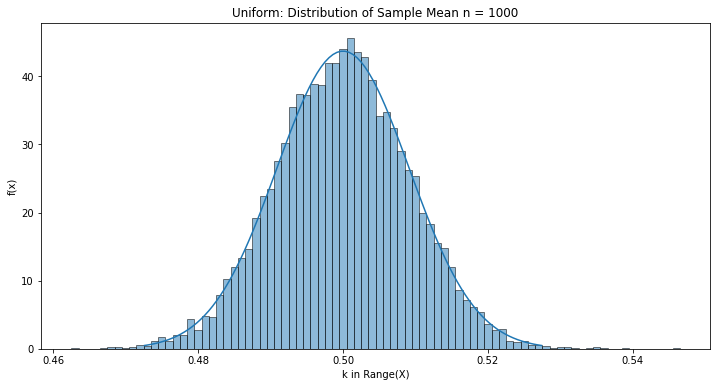

In [4]:
def sampleMeanUniform(n):
    X = [random() for i in range(n)]
    return sum(X)/n

def display_sample_mean_uniform(n,num_trials,decimals):
    fig, ax = plt.subplots(1,1,figsize=(12,6))
    plt.title('Uniform: Distribution of Sample Mean n = ' + str(n))
    plt.ylabel("f(x)")
    plt.xlabel("k in Range(X)")
    
    # use bernoulli to generate random samples
    X = [sampleMeanUniform(n) for i in range(num_trials)]
    Xrounded = [np.around(x,decimals) for x in X]
    # Now convert frequency counts into probabilities
    D = Counter( Xrounded )
    Xrounded = unique(Xrounded)       # sorts and removes duplicates
    P = [10**decimals*D[k]/num_trials for k in Xrounded]              # must multiply probs by 10**decimals because
    plt.bar(Xrounded,P,width=1/10**decimals, edgecolor='k',alpha=0.5) # bins are of width 1/10**decimals
    
    # Now generate the theoretical normal for sample mean with std dev sigma/sqrt(n)
    mu = 0.5
    sigma = ((1/12)**0.5) / n**0.5
    X2 = np.linspace(mu-sigma*3,mu+sigma*3,100)
    Y = [norm.pdf(x,mu,sigma) for x in X2]
    plt.plot(X2,Y)
    plt.show()

n = 1000                 # try for 1, 10, 30, 100
num_trials = 10000
display_sample_mean_uniform(n,num_trials,3)

## Experiment Four: Bernoulli

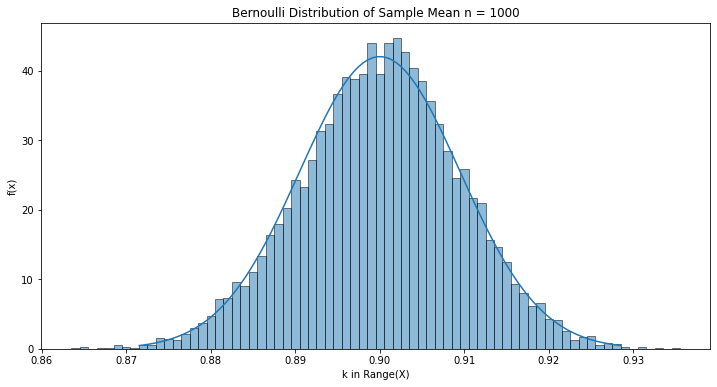

In [54]:

def bern(p):
    if random() < p:
        return 1
    else:
        return 0
    
def sampleMeanBernoulli(p,n):
    X = [bern(p) for i in range(n)]
    return sum(X)/n

def display_sample_mean_bernoulli(p,n,num_trials,decimals):
    fig, ax = plt.subplots(1,1,figsize=(12,6))
    plt.title('Bernoulli Distribution of Sample Mean n = ' +str(n) )
    plt.ylabel("f(x)")
    plt.xlabel("k in Range(X)")
    
    # use bernoulli to generate random samples
    X = [sampleMeanBernoulli(p,n) for i in range(num_trials)]
    Xrounded = [np.around(x,decimals) for x in X]
    # Now convert frequency counts into probabilities
    D = Counter( Xrounded )
    Xrounded = unique(Xrounded)       # sorts and removes duplicates
    P = [10**decimals*D[k]/num_trials for k in Xrounded]              # must multiply probs by 10**decimals because
    plt.bar(Xrounded,P,width=1/10**decimals, edgecolor='k',alpha=0.5) # bins are of width 1/10**decimals
    
    # Now generate the theoretical normal for sample mean with std dev sigma/sqrt(n)
    mu = p
    sigma = (p*(1-p))**0.5/(n**0.5)
    X2 = np.linspace(mu-sigma*3,mu+sigma*3,100)
    Y = [norm.pdf(x,mu,sigma) for x in X2]
    plt.plot(X2,Y)
    plt.show()

p = 0.9
n = 1000                 # try for 10, 100, 500, 1000
num_trials = 10000
display_sample_mean_bernoulli(p,n,num_trials,3)

## Experiment Five: Exponential

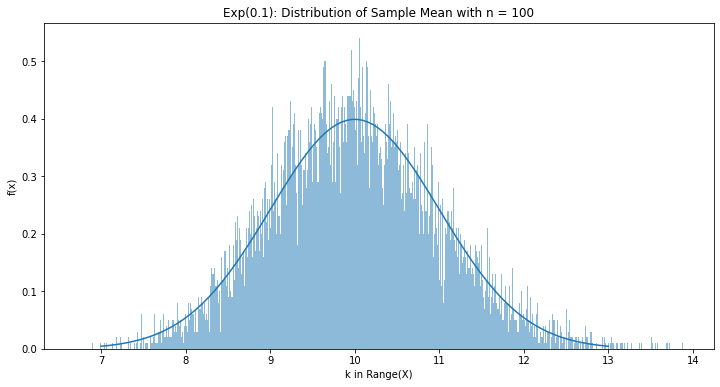

In [63]:
def sampleMeanExponential(lam,n):
    X = [exponential(1/lam) for i in range(n)]
    return sum(X)/n

def display_sample_mean_Exponential(lam,n,num_trials,decimals):
    fig, ax = plt.subplots(1,1,figsize=(12,6))
    plt.title('Exp('+str(lam)+'): Distribution of Sample Mean with n = ' + str(n))
    plt.ylabel("f(x)")
    plt.xlabel("k in Range(X)")
    
    # use exponential to generate random samples
    X = [sampleMeanExponential(lam,n) for i in range(num_trials)]
    Xrounded = [np.around(x,decimals) for x in X]
    # Now convert frequency counts into probabilities
    D = Counter( Xrounded )
    Xrounded = unique(Xrounded)       # sorts and removes duplicates
    P = [10**decimals*D[k]/num_trials for k in Xrounded]              # must multiply probs by 10**decimals because
    plt.bar(Xrounded,P,width=1/10**decimals, alpha=0.5) # bins are of width 1/10**decimals
    
    # Now generate the theoretical normal for sample mean with std dev sigma/sqrt(n)
    mu = 1/lam
    sigma = 1/lam / (n**0.5)
    X2 = np.linspace(mu-sigma*3,mu+sigma*3,100)
    Y = [norm.pdf(x,mu,sigma) for x in X2]
    plt.plot(X2,Y)
    plt.show()

lam = 0.1
n = 100
trials = 10000
display_sample_mean_Exponential(lam,n,num_trials,2)

